<a href="https://colab.research.google.com/github/aimanuel/JupyterNotebook/blob/main/7_Lending_Club_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

## Import standardization & train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Import Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Import Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

## Import Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

## Import Confusion & Classification Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Filepath

In [ ]:
filepath = '/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/lending_club_clean_convert2.csv'

In [ ]:
df = pd.read_csv(filepath)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391238 entries, 0 to 391237
Data columns (total 53 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             391238 non-null  float64
 1   60_mo_term            391238 non-null  int64  
 2   int_rate              391238 non-null  float64
 3   installment           391238 non-null  float64
 4   sub_grade             391238 non-null  int64  
 5   annual_inc            391238 non-null  float64
 6   loan_status           391238 non-null  int64  
 7   dti                   391238 non-null  float64
 8   open_acc              391238 non-null  float64
 9   pub_rec               391238 non-null  float64
 10  revol_bal             391238 non-null  float64
 11  revol_util            391238 non-null  float64
 12  total_acc             391238 non-null  float64
 13  initial_list_status   391238 non-null  int64  
 14  mort_acc              391238 non-null  float64
 15  

In [ ]:
df.head()

,loan_amnt,60_mo_term,int_rate,installment,sub_grade,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,HO_ANY,HO_MORTGAGE,HO_NONE,HO_OTHER,HO_OWN,HO_RENT,VS_Not Verified,VS_Source Verified,VS_Verified,PPS_car,PPS_cc,PPS_debtcons,PPS_edu,PPS_homeimp,PPS_house,PPS_majorprc,PPS_medical,PPS_moving,PPS_other,PPS_reneweng,PPS_smallbus,PPS_vacation,PPS_wedd,APP_DIRECTPAY,APP_INDIVIDUAL,APP_JOINT,EL_1,EL_10+,EL_2,EL_3,EL_4,EL_5,EL_6,EL_7,EL_8,EL_9,EL_less1
0,35000.0,0,25.83,1407.01,32,165800.0,1,7.42,5.0,0.0,16521.0,153.0,5.0,1,0.0,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,12000.0,1,16.55,295.34,17,45600.0,1,38.98,5.0,0.0,13880.0,152.5,11.0,1,5.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,10000.0,0,14.16,342.56,12,91000.0,1,20.94,9.0,0.0,9344.0,150.7,37.0,1,6.0,0.0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,25000.0,1,20.49,669.19,22,100000.0,0,15.16,5.0,0.0,20133.0,148.0,7.0,0,0.0,0.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,12600.0,0,8.39,397.11,5,96011.0,1,11.56,9.0,0.0,20033.0,146.1,22.0,0,4.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(391238, 53)

In [ ]:
print(df['loan_status'].value_counts())
print('1 = ',(100*63029/(63029+15219)))
print('0 = ',(100*15219/(63029+15219)))

1    314218
0     77020
Name: loan_status, dtype: int64
1 =  80.55030160515285
0 =  19.449698394847154


# '>>' Imbalanced Data

## Sampling your dataset instead of this giant number

In [ ]:
sampling_df = df.sample(frac=0.2, random_state=101)

## Split X, y train & test

In [ ]:
X = sampling_df.drop('loan_status',axis=1).values
y = sampling_df['loan_status'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
print('train data :',X_train.shape)
print('test data :',X_test.shape)

train data : (54773, 54)
test data : (23475, 54)


## Standardization/Normalize the data using MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Tensor Deep Learning model

since we had a 54 columns, we can plot 3 layers of neural networks, each layer (54,36,18).<br>
and This is a binary classification

In [ ]:
model = Sequential()

model.add(Dense(54,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(36,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(18,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=50, batch_size=256,validation_data=(X_test,y_test),
           callbacks=[early_stop])

Epoch 1/50
214/214 [==============================] - 2s 4ms/step - loss: 0.5049 - val_loss: 0.4551
Epoch 2/50
214/214 [==============================] - 1s 4ms/step - loss: 0.4720 - val_loss: 0.4546
Epoch 3/50
214/214 [==============================] - 1s 3ms/step - loss: 0.4666 - val_loss: 0.4516
Epoch 4/50
214/214 [==============================] - 1s 4ms/step - loss: 0.4635 - val_loss: 0.4538
Epoch 5/50
214/214 [==============================] - 1s 4ms/step - loss: 0.4614 - val_loss: 0.4520
Epoch 6/50
214/214 [==============================] - 1s 3ms/step - loss: 0.4588 - val_loss: 0.4512
Epoch 7/50
214/214 [==============================] - 1s 4ms/step - loss: 0.4584 - val_loss: 0.4494
Epoch 8/50
214/214 [==============================] - 1s 3ms/step - loss: 0.4569 - val_loss: 0.4494
Epoch 9/50
214/214 [==============================] - 1s 3ms/step - loss: 0.4555 - val_loss: 0.4494
Epoch 10/50
214/214 [==============================] - 1s 3ms/step - loss: 0.4556 - val_loss: 0.4495

## Plot out the losses

In [ ]:
losses = pd.DataFrame(model.history.history)

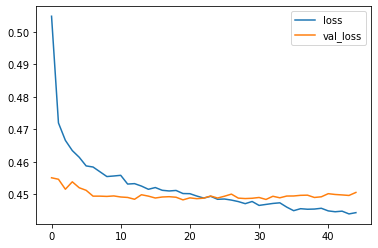

In [ ]:
losses.plot()

## Predict the X_test

In [ ]:
predictions = (model.predict(X_test) >0.5).astype("int32")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

## Bad result of Confusion & Classification Matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[  172  4388]
 [  154 18761]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.53      0.04      0.07      4560
           1       0.81      0.99      0.89     18915

    accuracy                           0.81     23475
   macro avg       0.67      0.51      0.48     23475
weighted avg       0.76      0.81      0.73     23475



This is clearly not good, and imbalanced, F1 score of default is very bad

# '>>' Imbalance Handling : SMOTE Algorithm (Oversampling)

In [ ]:
from imblearn.over_sampling import SMOTE

## Sampling your model for SMOTE

In [ ]:
sampling_df2 = df.sample(frac=0.5, random_state=101)

## Set the X & y, then train test split for SMOTE

In [ ]:
smote_X = sampling_df2.drop('loan_status',axis=1).values
smote_y = sampling_df2['loan_status'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(smote_X,smote_y,test_size=0.2,random_state=101)

In [ ]:
print("Before OverSampling, counts of label '1' TRAIN set: {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0' TRAIN set: {} \n".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1' TEST set: {}".format(sum(y_test == 1)))
print("Before OverSampling, counts of label '0' TEST set: {} \n".format(sum(y_test == 0)))

Before OverSampling, counts of label '1' TRAIN set: 125695
Before OverSampling, counts of label '0' TRAIN set: 30800 

Before OverSampling, counts of label '1' TEST set: 31420
Before OverSampling, counts of label '0' TEST set: 7704 



## Apply SMOTE to our train data both X & y

In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#X_test_res, y_test_res = sm.fit_sample(X_test,y_test.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (251390, 52)
After OverSampling, the shape of train_y: (251390,) 

After OverSampling, counts of label '1': 125695
After OverSampling, counts of label '0': 125695


In [ ]:
#print('After OverSampling, the shape of test_X: {}'.format(X_test_res.shape))
#print('After OverSampling, the shape of test_y: {} \n'.format(y_test_res.shape))
 
#print("After OverSampling, counts of label '1': {}".format(sum(y_test_res == 1)))
#print("After OverSampling, counts of label '0': {}".format(sum(y_test_res == 0)))

## Standardization/Normalize the data using MinMaxScaler

In [ ]:
scaler_smote = MinMaxScaler()
X_train_res = scaler_smote.fit_transform(X_train_res)

In [ ]:
X_test = scaler_smote.transform(X_test)

## Tensor Deep Learning

In [ ]:
model_smote = Sequential()

model_smote.add(Dense(53,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(36,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(18,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(9,activation='relu'))
model_smote.add(Dropout(0.2))

# BINARY CLASSIFICATION
model_smote.add(Dense(1,activation='sigmoid'))

model_smote.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model_smote.fit(x=X_train_res,y=y_train_res,epochs=50, batch_size=256,validation_data=(X_test,y_test),
           callbacks=[early_stop])

Epoch 1/50
982/982 [==============================] - 4s 3ms/step - loss: 0.5628 - val_loss: 0.4909
Epoch 2/50
982/982 [==============================] - 3s 3ms/step - loss: 0.4622 - val_loss: 0.4960
Epoch 3/50
982/982 [==============================] - 3s 3ms/step - loss: 0.4229 - val_loss: 0.4655
Epoch 4/50
982/982 [==============================] - 3s 3ms/step - loss: 0.4014 - val_loss: 0.4656
Epoch 5/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3888 - val_loss: 0.4718
Epoch 6/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3791 - val_loss: 0.4618
Epoch 7/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3735 - val_loss: 0.4664
Epoch 8/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3685 - val_loss: 0.4651
Epoch 9/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3649 - val_loss: 0.4608
Epoch 10/50
982/982 [==============================] - 3s 3ms/step - loss: 0.3611 - val_loss: 0.4809

## Plot out the losses

In [ ]:
losses_smote = pd.DataFrame(model_smote.history.history)

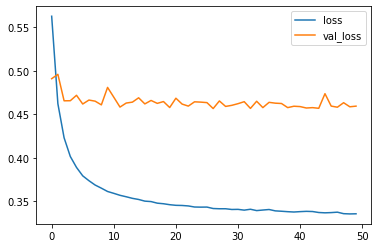

In [ ]:
losses_smote.plot()

## Predict the X_test_res

In [ ]:
predictions_smote = (model_smote.predict(X_test) >0.5).astype("int32")

## Voila Confusion & Classification Reports by SMOTE

In [ ]:
print(confusion_matrix(y_test,predictions_smote))

[[  271  7433]
 [  248 31172]]


In [ ]:
print(classification_report(y_test,predictions_smote))

              precision    recall  f1-score   support

           0       0.52      0.04      0.07      7704
           1       0.81      0.99      0.89     31420

    accuracy                           0.80     39124
   macro avg       0.66      0.51      0.48     39124
weighted avg       0.75      0.80      0.73     39124



# '>>' Imbalance Handling : Near Miss Algorithm (Undersampling)

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
nearmi_X = sampling_df2.drop('loan_status',axis=1).values
nearmi_y = sampling_df2['loan_status'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(nearmi_X,nearmi_y,test_size=0.2,random_state=101)

In [ ]:
nr = NearMiss()

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before Undersampling, counts of label '1': 125695
Before Undersampling, counts of label '0': 30800 



In [ ]:
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

After Undersampling, the shape of train_X: (61600, 54)
After Undersampling, the shape of train_y: (61600,) 

After Undersampling, counts of label '1': 30800
After Undersampling, counts of label '0': 30800


In [ ]:
nearmi_scaler = MinMaxScaler()

In [ ]:
X_train_miss = nearmi_scaler.fit_transform(X_train_miss)

In [ ]:
X_test = nearmi_scaler.transform(X_test)

In [ ]:
model_nearmi = Sequential()

model_nearmi.add(Dense(54,activation='relu'))
model_nearmi.add(Dropout(0.2))

model_nearmi.add(Dense(36,activation='relu'))
model_nearmi.add(Dropout(0.2))

model_nearmi.add(Dense(18,activation='relu'))
#model_nearmi.add(Dropout(0.2))

# BINARY CLASSIFICATION
model_nearmi.add(Dense(1,activation='sigmoid'))

model_nearmi.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
model_nearmi.fit(x=X_train_miss,y=y_train_miss,epochs=100, batch_size=256,validation_data=(X_test,y_test),
           callbacks=[early_stop])

Epoch 1/100
241/241 [==============================] - 1s 4ms/step - loss: 0.6305 - val_loss: 0.4851
Epoch 2/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5987 - val_loss: 0.5044
Epoch 3/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5884 - val_loss: 0.5366
Epoch 4/100
241/241 [==============================] - 1s 4ms/step - loss: 0.5814 - val_loss: 0.5352
Epoch 5/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5754 - val_loss: 0.5488
Epoch 6/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5725 - val_loss: 0.5538
Epoch 7/100
241/241 [==============================] - 1s 4ms/step - loss: 0.5687 - val_loss: 0.5600
Epoch 8/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5646 - val_loss: 0.5717
Epoch 9/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5606 - val_loss: 0.5431
Epoch 10/100
241/241 [==============================] - 1s 3ms/step - loss: 0.5578 - val_lo

In [ ]:
losses_nearmi = pd.DataFrame(model_nearmi.history.history)

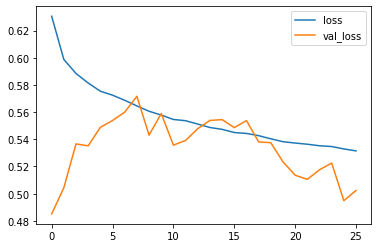

In [ ]:
losses_nearmi.plot()

In [ ]:
predictions_nearmi = (model_nearmi.predict(X_test) >0.5).astype("int32")

In [ ]:
print(confusion_matrix(y_test,predictions_nearmi))

[[   37  7667]
 [   85 31335]]


In [ ]:
print(classification_report(y_test,predictions_nearmi))

              precision    recall  f1-score   support

           0       0.31      0.09      0.14      7704
           1       0.81      0.95      0.87     31420

    accuracy                           0.78     39124
   macro avg       0.56      0.52      0.51     39124
weighted avg       0.71      0.78      0.73     39124



# '>>' Logistic Regression Method with SMOTE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logres_X = sampling_df2.drop('loan_status',axis=1).values
logres_y = sampling_df2['loan_status'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(logres_X,logres_y,test_size=0.3,random_state=101)

In [ ]:
logres_scaler = MinMaxScaler()

In [ ]:
X_train = logres_scaler.fit_transform(X_train)

In [ ]:
X_test = logres_scaler.transform(X_test)

In [ ]:
logmodel = LogisticRegression(max_iter=10000)

In [ ]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logres_predictions = logmodel.predict(X_test)

In [ ]:
confusion_matrix(y_test,logres_predictions)

array([[  872, 10732],
       [  846, 46236]])

In [ ]:
print(classification_report(y_test,logres_predictions))

              precision    recall  f1-score   support

           0       0.51      0.08      0.13     11604
           1       0.81      0.98      0.89     47082

    accuracy                           0.80     58686
   macro avg       0.66      0.53      0.51     58686
weighted avg       0.75      0.80      0.74     58686



# Save my model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
folderpath = '/content/drive/MyDrive/13. Python/Machine Learning/TensorFlow_FILES/DATA/'

In [ ]:
model2.save(folderpath+'LendingClub_model.h5')

# Further read for imbalanced dataset

https://www.kdnuggets.com/2018/12/handling-imbalanced-datasets-deep-learning.html

https://stackoverflow.com/questions/35049379/training-on-imbalanced-data-using-tensorflow

https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

https://www.machinecurve.com/index.php/2020/11/10/working-with-imbalanced-datasets-with-tensorflow-and-keras/